<a href="https://colab.research.google.com/github/kroosYE/project/blob/main/2330TW%E7%AD%96%E7%95%A5%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分析目標
分析比較動能交易常用技術指標與定期定額於2020-2022期間的總報酬率及交易成本，利用此結果判斷兩種策略的優劣性。

In [62]:
!pip install  mplfinance #安裝金融分析可視化模組

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.1 MB/s eta 0:00:00


In [63]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-01-28 13:33:20--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-28 13:33:20--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-28 13:33:21--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [64]:
import requests
import pandas as pd
from io import StringIO #從內存中讀取string
import datetime
import os
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline
import talib
import numpy as np

## MACD
就是指數平滑異同移動平均線（ Moving Average Convergence / Divergence ）透過計算「收盤時股價或指數變化的指數移動平均值（ EMA ）」之間的離差程度（ DIF ）而來，用來確定波段漲幅並找到買賣點。

In [65]:
df = pd.read_csv('/2330台積電(2020-2022歷史股價.csv', index_col= 'Date') #載入資料
df = df.loc['2020-01-01':]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+08:00,332.5,339.0,332.5,339.0,316.966614,31754120
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057
2020-01-07 00:00:00+08:00,332.5,333.0,326.5,329.5,308.084076,50879181
2020-01-08 00:00:00+08:00,325.0,333.0,325.0,329.5,308.084076,37567748
...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.0,457.0,453.5,456.5,456.500000,8793306
2022-12-27 00:00:00+08:00,458.0,462.5,457.0,457.0,457.000000,10264001
2022-12-28 00:00:00+08:00,451.0,452.0,446.0,451.0,451.000000,32578949


In [66]:
np.any(pd.isnull(df)) #檢查是否有空值

False

In [67]:
#指數移動平均線
df['ShortEMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['LongEMA'] = df['Close'].ewm(span=26, adjust=False).mean() 
df['DIF'] = df['ShortEMA'] - df['LongEMA']
df['MACD'] = df['DIF'].ewm(span=9, adjust=False).mean()
df['HIST'] = df['DIF'] - df['MACD']
df

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST
Date,,,,,,,,,,,
2020-01-02 00:00:00+08:00,332.5,339.0,332.5,339.0,316.966614,31754120,339.000000,339.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268,339.076923,339.037037,0.039886,0.007977,0.031909
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057,337.988166,338.515775,-0.527609,-0.099140,-0.428469
2020-01-07 00:00:00+08:00,332.5,333.0,326.5,329.5,308.084076,50879181,336.682294,337.847940,-1.165646,-0.312441,-0.853205
2020-01-08 00:00:00+08:00,325.0,333.0,325.0,329.5,308.084076,37567748,335.577326,337.229574,-1.652248,-0.580403,-1.071846
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.0,457.0,453.5,456.5,456.500000,8793306,466.343144,466.587596,-0.244452,4.264265,-4.508716
2022-12-27 00:00:00+08:00,458.0,462.5,457.0,457.0,457.000000,10264001,464.905737,465.877404,-0.971666,3.217078,-4.188745
2022-12-28 00:00:00+08:00,451.0,452.0,446.0,451.0,451.000000,32578949,462.766393,464.775374,-2.008981,2.171867,-4.180847


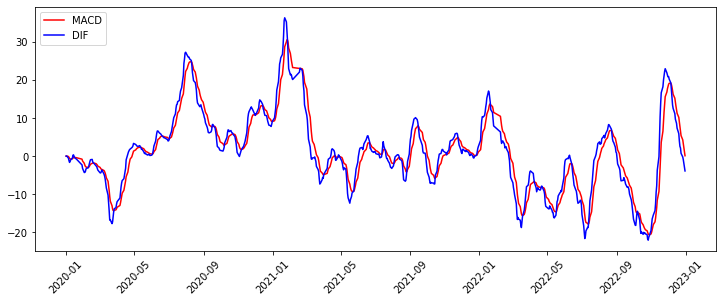

In [68]:
#畫出MACD與DIF的交叉走勢圖
df.index  = pd.DatetimeIndex(df.index)
plt.figure(figsize=(12.2,4.5))
plt.xticks(rotation=45)
plt.plot(df.index , df['MACD'], label='MACD', color='red')
plt.plot(df.index , df['DIF'], label='DIF', color='Blue')
plt.legend(loc='upper left')
plt.show()

In [69]:
diff=np.sign(df["DIF"]-df["MACD"])
signal=np.sign(diff-diff.shift(1))
down_cross=df[signal<0]
up_cross=df[signal>0]
df['signal'] = signal
df

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST,signal
Date,,,,,,,,,,,,
2020-01-02 00:00:00+08:00,332.5,339.0,332.5,339.0,316.966614,31754120,339.000000,339.000000,0.000000,0.000000,0.000000,NaN
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268,339.076923,339.037037,0.039886,0.007977,0.031909,1.0
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057,337.988166,338.515775,-0.527609,-0.099140,-0.428469,-1.0
2020-01-07 00:00:00+08:00,332.5,333.0,326.5,329.5,308.084076,50879181,336.682294,337.847940,-1.165646,-0.312441,-0.853205,0.0
2020-01-08 00:00:00+08:00,325.0,333.0,325.0,329.5,308.084076,37567748,335.577326,337.229574,-1.652248,-0.580403,-1.071846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.0,457.0,453.5,456.5,456.500000,8793306,466.343144,466.587596,-0.244452,4.264265,-4.508716,0.0
2022-12-27 00:00:00+08:00,458.0,462.5,457.0,457.0,457.000000,10264001,464.905737,465.877404,-0.971666,3.217078,-4.188745,0.0
2022-12-28 00:00:00+08:00,451.0,452.0,446.0,451.0,451.000000,32578949,462.766393,464.775374,-2.008981,2.171867,-4.180847,0.0


In [70]:
#計算進場時機
#signal = 1 買進股票
buy = []
for i in range(len(df)):
    if df["signal"][i] == 1.0:
        buy.append(1) #加在表格最後面
    else:
        buy.append(0)
df["buy"] = buy
df

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST,signal,buy
Date,,,,,,,,,,,,,
2020-01-02 00:00:00+08:00,332.5,339.0,332.5,339.0,316.966614,31754120,339.000000,339.000000,0.000000,0.000000,0.000000,NaN,0
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268,339.076923,339.037037,0.039886,0.007977,0.031909,1.0,1
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057,337.988166,338.515775,-0.527609,-0.099140,-0.428469,-1.0,0
2020-01-07 00:00:00+08:00,332.5,333.0,326.5,329.5,308.084076,50879181,336.682294,337.847940,-1.165646,-0.312441,-0.853205,0.0,0
2020-01-08 00:00:00+08:00,325.0,333.0,325.0,329.5,308.084076,37567748,335.577326,337.229574,-1.652248,-0.580403,-1.071846,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.0,457.0,453.5,456.5,456.500000,8793306,466.343144,466.587596,-0.244452,4.264265,-4.508716,0.0,0
2022-12-27 00:00:00+08:00,458.0,462.5,457.0,457.0,457.000000,10264001,464.905737,465.877404,-0.971666,3.217078,-4.188745,0.0,0
2022-12-28 00:00:00+08:00,451.0,452.0,446.0,451.0,451.000000,32578949,462.766393,464.775374,-2.008981,2.171867,-4.180847,0.0,0


In [71]:
#計算賣出時機
sell = []
for i in range(len(df)):
  if df['signal'][i] == -1.0:
    sell.append(-1)
  else:
    sell.append(0)
df['sell'] = sell
df

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST,signal,buy,sell
Date,,,,,,,,,,,,,,
2020-01-02 00:00:00+08:00,332.5,339.0,332.5,339.0,316.966614,31754120,339.000000,339.000000,0.000000,0.000000,0.000000,NaN,0,0
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268,339.076923,339.037037,0.039886,0.007977,0.031909,1.0,1,0
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057,337.988166,338.515775,-0.527609,-0.099140,-0.428469,-1.0,0,-1
2020-01-07 00:00:00+08:00,332.5,333.0,326.5,329.5,308.084076,50879181,336.682294,337.847940,-1.165646,-0.312441,-0.853205,0.0,0,0
2020-01-08 00:00:00+08:00,325.0,333.0,325.0,329.5,308.084076,37567748,335.577326,337.229574,-1.652248,-0.580403,-1.071846,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.0,457.0,453.5,456.5,456.500000,8793306,466.343144,466.587596,-0.244452,4.264265,-4.508716,0.0,0,0
2022-12-27 00:00:00+08:00,458.0,462.5,457.0,457.0,457.000000,10264001,464.905737,465.877404,-0.971666,3.217078,-4.188745,0.0,0,0
2022-12-28 00:00:00+08:00,451.0,452.0,446.0,451.0,451.000000,32578949,462.766393,464.775374,-2.008981,2.171867,-4.180847,0.0,0,0


In [72]:
#取出買進日期 buy 等於 1
df.loc[df['buy']. isin([1])]

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST,signal,buy,sell
Date,,,,,,,,,,,,,,
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268,339.076923,339.037037,0.039886,0.007977,0.031909,1.0,1,0
2020-01-13 00:00:00+08:00,342.0,342.0,339.0,341.5,319.304199,30663332,337.210933,337.718798,-0.507864,-0.732561,0.224696,1.0,1,0
2020-02-11 00:00:00+08:00,330.5,332.5,330.0,331.5,309.954102,27524935,328.999640,331.613737,-2.614097,-2.881307,0.267210,1.0,1,0
2020-03-27 00:00:00+08:00,284.0,286.0,273.0,273.0,257.734528,68752306,276.650788,290.466303,-13.815515,-14.236303,0.420788,1.0,1,0
2020-06-03 00:00:00+08:00,300.0,301.0,298.0,301.0,284.168823,65176337,295.702632,294.834962,0.867670,0.582158,0.285512,1.0,1,0
2020-07-03 00:00:00+08:00,327.0,330.5,326.5,329.5,313.563812,53341987,317.361702,312.169947,5.191755,4.668591,0.523164,1.0,1,0
2020-09-16 00:00:00+08:00,460.0,462.0,455.5,458.0,435.848907,64261238,438.645893,430.490781,8.155112,7.701838,0.453274,1.0,1,0
2020-10-08 00:00:00+08:00,450.0,454.0,448.5,453.0,433.456757,60853811,438.344262,434.860314,3.483948,2.951045,0.532903,1.0,1,0
2020-11-09 00:00:00+08:00,458.0,460.0,454.0,458.5,438.719482,39245881,448.264789,445.945453,2.319336,1.869069,0.450267,1.0,1,0


In [73]:
#取出賣出日期
df.loc[df['sell']. isin([-1])]

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST,signal,buy,sell
Date,,,,,,,,,,,,,,
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057,337.988166,338.515775,-0.527609,-0.099140,-0.428469,-1.0,0,-1
2020-01-17 00:00:00+08:00,334.0,335.5,332.0,333.0,311.356659,52060097,337.336587,337.780315,-0.443727,-0.329154,-0.114573,-1.0,0,-1
2020-02-20 00:00:00+08:00,328.0,329.0,325.0,325.5,304.344116,27011736,328.810315,330.706060,-1.895745,-1.814912,-0.080833,-1.0,0,-1
2020-05-13 00:00:00+08:00,293.0,297.0,292.5,297.0,280.392517,26156418,296.639726,294.385148,2.254578,2.329709,-0.075130,-1.0,0,-1
2020-06-22 00:00:00+08:00,314.5,316.5,312.0,312.0,296.910156,37374616,312.425578,307.479580,4.945998,5.188995,-0.242997,-1.0,0,-1
2020-08-11 00:00:00+08:00,432.0,435.0,429.0,429.0,408.251526,34545313,421.412999,397.454879,23.958120,24.618937,-0.660817,-1.0,0,-1
2020-09-21 00:00:00+08:00,443.5,450.0,440.0,440.0,421.017639,39463920,440.636634,433.265430,7.371204,7.768847,-0.397644,-1.0,0,-1
2020-10-23 00:00:00+08:00,458.0,458.0,451.5,452.0,432.499908,18777385,451.140637,445.465563,5.675074,5.808829,-0.133755,-1.0,0,-1
2020-12-01 00:00:00+08:00,489.5,490.0,483.5,490.0,468.860565,37018651,483.687820,472.997686,10.690134,10.810751,-0.120618,-1.0,0,-1


In [74]:
#買進的日期以紅色三角形標示
buy_mark = []
for i in range(len(df)):
  if df['buy'][i] == 1:
    buy_mark.append(df['High'][i] + 10) 
  else:
    buy_mark.append(np.nan)
df['buy_mark'] = buy_mark
df

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST,signal,buy,sell,buy_mark
Date,,,,,,,,,,,,,,,
2020-01-02 00:00:00+08:00,332.5,339.0,332.5,339.0,316.966614,31754120,339.000000,339.000000,0.000000,0.000000,0.000000,NaN,0,0,NaN
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268,339.076923,339.037037,0.039886,0.007977,0.031909,1.0,1,0,355.0
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057,337.988166,338.515775,-0.527609,-0.099140,-0.428469,-1.0,0,-1,NaN
2020-01-07 00:00:00+08:00,332.5,333.0,326.5,329.5,308.084076,50879181,336.682294,337.847940,-1.165646,-0.312441,-0.853205,0.0,0,0,NaN
2020-01-08 00:00:00+08:00,325.0,333.0,325.0,329.5,308.084076,37567748,335.577326,337.229574,-1.652248,-0.580403,-1.071846,0.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.0,457.0,453.5,456.5,456.500000,8793306,466.343144,466.587596,-0.244452,4.264265,-4.508716,0.0,0,0,NaN
2022-12-27 00:00:00+08:00,458.0,462.5,457.0,457.0,457.000000,10264001,464.905737,465.877404,-0.971666,3.217078,-4.188745,0.0,0,0,NaN
2022-12-28 00:00:00+08:00,451.0,452.0,446.0,451.0,451.000000,32578949,462.766393,464.775374,-2.008981,2.171867,-4.180847,0.0,0,0,NaN


In [75]:
#賣出日期以綠色三角形標示
sell_mark = []
for i in range(len(df)):
  if df['sell'][i] == -1:
    sell_mark.append(df['Low'][i] + -10) 
  else:
    sell_mark.append(np.nan)
df['sell_mark'] = sell_mark
df

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,LongEMA,DIF,MACD,HIST,signal,buy,sell,buy_mark,sell_mark
Date,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+08:00,332.5,339.0,332.5,339.0,316.966614,31754120,339.000000,339.000000,0.000000,0.000000,0.000000,NaN,0,0,NaN,NaN
2020-01-03 00:00:00+08:00,344.0,345.0,335.5,339.5,317.434174,41811268,339.076923,339.037037,0.039886,0.007977,0.031909,1.0,1,0,355.0,NaN
2020-01-06 00:00:00+08:00,333.0,334.5,332.0,332.0,310.421631,45343057,337.988166,338.515775,-0.527609,-0.099140,-0.428469,-1.0,0,-1,NaN,322.0
2020-01-07 00:00:00+08:00,332.5,333.0,326.5,329.5,308.084076,50879181,336.682294,337.847940,-1.165646,-0.312441,-0.853205,0.0,0,0,NaN,NaN
2020-01-08 00:00:00+08:00,325.0,333.0,325.0,329.5,308.084076,37567748,335.577326,337.229574,-1.652248,-0.580403,-1.071846,0.0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.0,457.0,453.5,456.5,456.500000,8793306,466.343144,466.587596,-0.244452,4.264265,-4.508716,0.0,0,0,NaN,NaN
2022-12-27 00:00:00+08:00,458.0,462.5,457.0,457.0,457.000000,10264001,464.905737,465.877404,-0.971666,3.217078,-4.188745,0.0,0,0,NaN,NaN
2022-12-28 00:00:00+08:00,451.0,452.0,446.0,451.0,451.000000,32578949,462.766393,464.775374,-2.008981,2.171867,-4.180847,0.0,0,0,NaN,NaN


/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


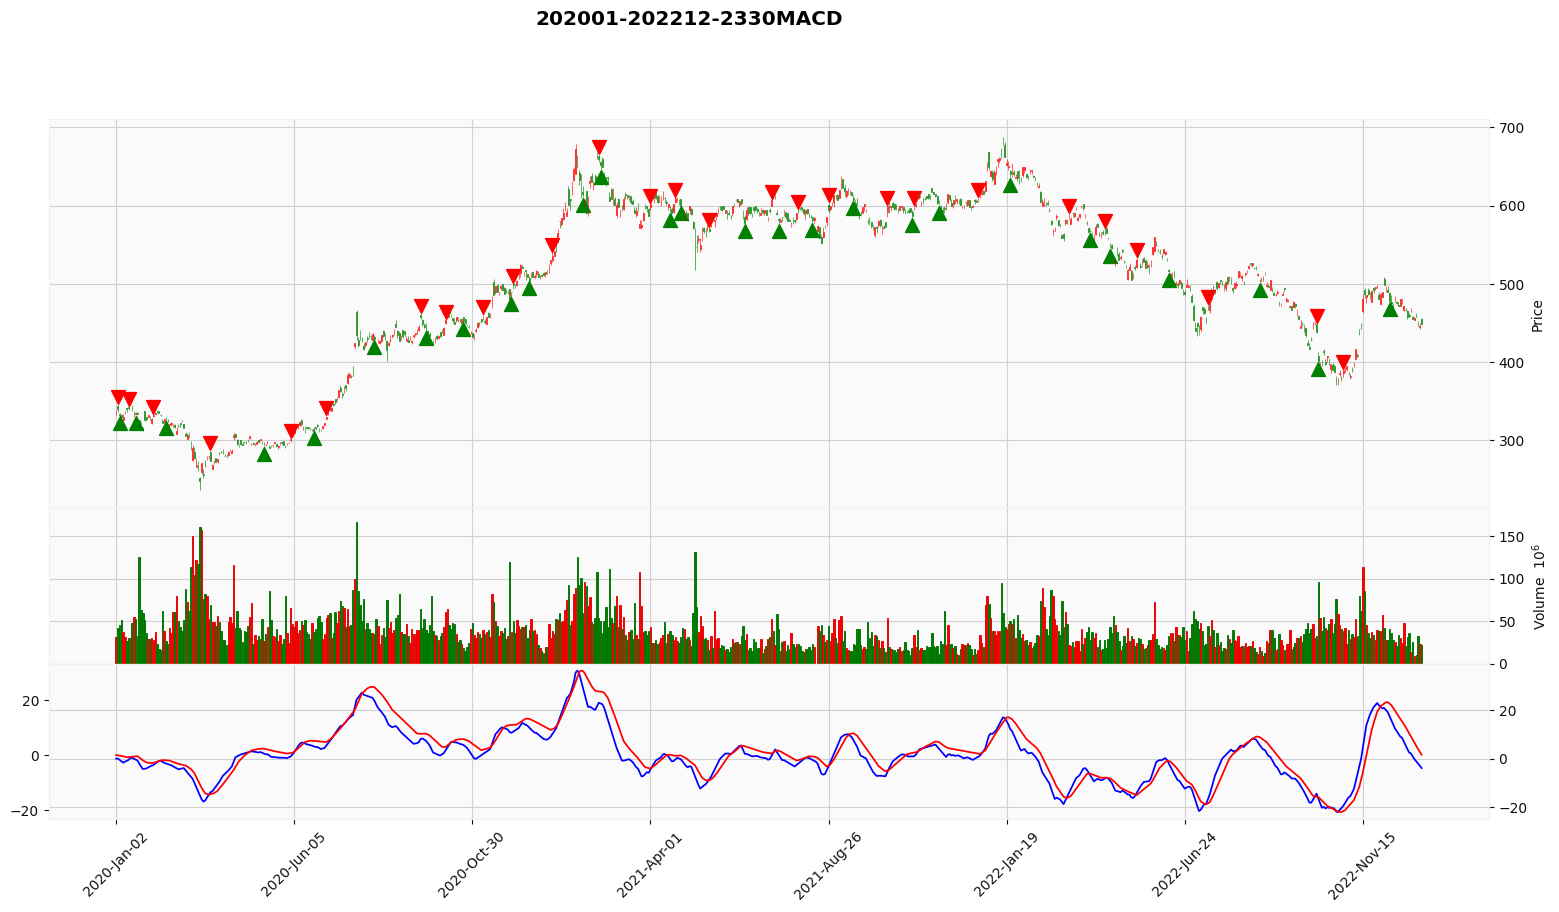

In [76]:
#繪製出圖
stock_id = '202001-202212-2330MACD'
mc = mpf.make_marketcolors(up= 'r', down= 'g', inherit = True)
s = mpf.make_mpf_style(base_mpf_style= 'yahoo', marketcolors = mc)
add_plot = [mpf.make_addplot(df['buy_mark'], scatter = True, markersize = 100, marker = 'v', color = 'r'),
            mpf.make_addplot(df['sell_mark'], scatter = True, markersize = 100, marker = '^', color = 'g'),
            mpf.make_addplot(df['DIF'], panel = 2, color = 'b'),
            mpf.make_addplot(df['MACD'], panel = 2, color = 'r')
            ]
kwargs = dict(type = 'candle', volume = True, figsize = (20, 10), title = stock_id, style = s, addplot = add_plot)
mpf.plot(df, **kwargs)

In [77]:
#計算買進賣出次數
buy1 = df.loc[df['buy'].isin([1])]
sell1 = df.loc[df['sell'].isin([-1])]
print('總共買進'+ str(len(buy1))+ '次')
print('總共賣出'+ str(len(buy1))+ '次')

總共買進27次
總共賣出27次


In [78]:
#計算投報率
return_rate = []
for i in range(len(buy1)):
  rate = round((sell1['Adj Close'][i] - buy1['Adj Close'][i]) / buy1['Adj Close'][i] * 100 ,2) #取小數點後兩位
  return_rate.append(rate)
return_rate

[-2.21,
 -2.49,
 -1.81,
 8.79,
 4.48,
 30.2,
 -3.4,
 -0.22,
 6.87,
 1.0,
 14.74,
 -1.21,
 -1.66,
 -1.64,
 2.18,
 -4.12,
 -2.19,
 2.19,
 -2.17,
 0.5,
 5.78,
 -3.24,
 -4.04,
 -2.64,
 7.12,
 -8.33,
 22.56]

In [79]:
return_all = sorted(return_rate, reverse= True) #以降序排序
print('該策略最高報酬率為:' + str(return_all[0]) + '%')
print('該策略最低報酬率為:' + str(return_all[-1]) + '%')

該策略最高報酬率為:30.2%
該策略最低報酬率為:-8.33%


In [80]:
#計算勝率、獲利次數、虧損次數、交易次數等資料
win = len([i for i in return_rate if i > 0])
lose = len([i for i in return_rate if i <= 0])
sum_t = len(return_rate)
print('總獲利次數:' + str(win) + '次')
print('總虧損次數:' + str(lose) + '次')
print('總交易次數:' + str(sum_t) + '次')
print('交易勝率:' + str(round(win / sum_t * 100, 2)) + "%")

總獲利次數:12次
總虧損次數:15次
總交易次數:27次
交易勝率:44.44%


In [81]:
#計算總報酬率與單次報酬率
cum_return = [0]
for i in range(len(return_rate)):
  cum = round(return_rate[i] + cum_return[i], 2)
  cum_return.append(cum)
print("該策略的總報酬率為" + str(cum_return[-1]) + '%')
print("該策略的平均報酬率為" + str(round(cum_return[-1] / (win + lose), 2)) + '%')

該策略的總報酬率為65.04%
該策略的平均報酬率為2.41%


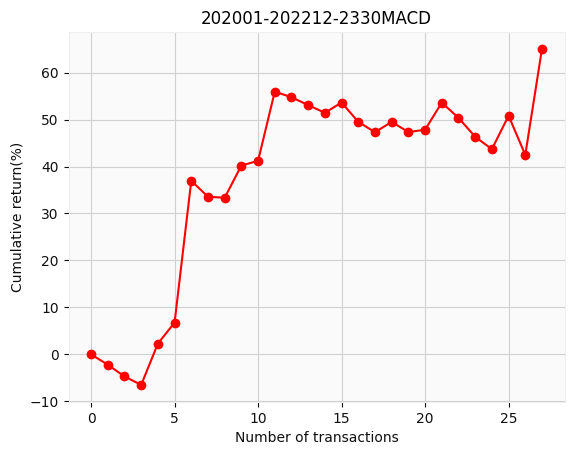

In [82]:
plt.title("202001-202212-2330MACD")
plt.ylabel("Cumulative return(%)")
plt.xlabel("Number of transactions")
plt.plot(cum_return,"ro-")
plt.show()

## 定期定額
預設每次投入金額為 3000 NT，每月固定投入。

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
data = pd.read_csv('/2330台積電(2020-2022歷史股價.csv')
data.set_index(pd.to_datetime(data['Date'], format = '%Y/%m/%d'), inplace = True)
data.drop('Date', axis = 1, inplace = True)
data.drop('Open', axis=1, inplace= True)
data.drop('High', axis=1, inplace= True)
data.drop('Low', axis=1, inplace= True)
data.drop('Adj Close', axis=1, inplace= True)
data.drop('Volume', axis=1, inplace= True)
data.head()

,Close
Date,
2020-01-02 00:00:00+08:00,339.0
2020-01-03 00:00:00+08:00,339.5
2020-01-06 00:00:00+08:00,332.0
2020-01-07 00:00:00+08:00,329.5
2020-01-08 00:00:00+08:00,329.5


In [85]:
PMT = 3000 #每期投入金額
start = '2020-01-01'
end = '2022-12-31'
df1 = data.copy()
dfm = df1.resample('BM').last() #重新設定時間戳記為每月月底
dfm = dfm.loc[start:end]
dfm

,Close
Date,
2020-01-31 00:00:00+08:00,320.0
2020-02-28 00:00:00+08:00,316.0
2020-03-31 00:00:00+08:00,274.0
2020-04-30 00:00:00+08:00,304.5
2020-05-29 00:00:00+08:00,292.0
2020-06-30 00:00:00+08:00,313.0
2020-07-31 00:00:00+08:00,425.5
2020-08-31 00:00:00+08:00,426.5
2020-09-30 00:00:00+08:00,433.0


In [86]:
#計算出投入總成本
TC_list = []
for i in range(1, len(dfm) +1):
  TC = PMT * i
  TC_list.append(TC)
dfm['Total_cost'] = TC_list

#購買的單位數
unit_list = [PMT / dfm['Close'].iloc[0]]
for i in dfm['Close'].iloc[1:]:
  unit = round(unit_list[-1] + PMT / i, 2)
  unit_list.append(unit)
dfm['Unit'] = unit_list

#計算前期淨值
preNAV_list = [0]
for i,j in enumerate(dfm['Close'].iloc[1:]):
  preNAV = round(dfm['Unit'].iloc[i] * j, 2)
  preNAV_list.append(preNAV)
dfm['pre_NAV'] = preNAV_list

#計算每期累計投報率
dfm['total_return'] = round((dfm['pre_NAV'] / (dfm['Total_cost'] - PMT) - 1) * 100, 2)


dfm

,Close,Total_cost,Unit,pre_NAV,total_return
Date,,,,,
2020-01-31 00:00:00+08:00,320.0,3000,9.375,0.00,NaN
2020-02-28 00:00:00+08:00,316.0,6000,18.870,2962.50,-1.25
2020-03-31 00:00:00+08:00,274.0,9000,29.820,5170.38,-13.83
2020-04-30 00:00:00+08:00,304.5,12000,39.670,9080.19,0.89
2020-05-29 00:00:00+08:00,292.0,15000,49.940,11583.64,-3.47
2020-06-30 00:00:00+08:00,313.0,18000,59.520,15631.22,4.21
2020-07-31 00:00:00+08:00,425.5,21000,66.570,25325.76,40.70
2020-08-31 00:00:00+08:00,426.5,24000,73.600,28392.10,35.20
2020-09-30 00:00:00+08:00,433.0,27000,80.530,31868.80,32.79


## 結論
以上我們試用兩種投資策略購買2330台積電，從數據顯示的結果而言2330台積電於2020-2022年期間，利用單一技術指標MACD為依據的投資策略能獲得總報酬:65.04%，定期定額總報酬則是難堪的:-4.10%，用以上的結果簡單下個結論:單論2020-2022疫情期間的市場行情，我們已可知為動能交易較為興盛且有效的時期，定期定額在此期間所累計的投資成本相對在有一定漲跌幅的市場趨勢下是較高的，所以在以上的數據結果呈現出此種情況，以上的回測並不能代表此兩種策略模式在長期執行下的孰優孰劣，僅能代表在過去三年的2330TW行情中動能交易是能夠取得較好的報酬率。